<a href="https://colab.research.google.com/github/sreeman-11021996/Flight_Fare_Prediction/blob/main/internship_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv


In [221]:
data_test = pd.read_csv("train.csv")
df = pd.read_csv("train.csv")

In [5]:
data = pd.read_csv("train.csv")

In [128]:
test_data = pd.read_csv("test.csv")

In [6]:
data.iloc[0]

Airline                  IndiGo
Date_of_Journey      24/03/2019
Source                 Banglore
Destination           New Delhi
Route                 BLR → DEL
Dep_Time                  22:20
Arrival_Time       01:10 22 Mar
Duration                 2h 50m
Total_Stops            non-stop
Additional_Info         No info
Price                      3897
Name: 0, dtype: object

1. EDA

In [7]:
data.shape

(10683, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Missing Values
data.isnull().mean()

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [10]:
# Missing Values => "Route" & "Total_stops"

In [11]:
# Check Duplicates

In [12]:
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [13]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
data.shape

(10463, 11)

In [15]:
# Seperate Features

In [16]:
time_feat = ["Date_of_Journey","Dep_Time","Arrival_Time","Duration"]

In [17]:
input_feat = list(data.columns)[:-1]

In [18]:
cat_feat = [feat for feat in input_feat if feat not in time_feat]

In [19]:
# Check Unique Values

In [20]:
def get_unique_vals(X:pd.DataFrame,feat_list:list):
  for feat in feat_list:
    unique_val_list = X[feat].unique()
    print(f"{feat} unique values: {len(unique_val_list)}")
    if len(unique_val_list) < 20:
      print(unique_val_list)
    print("\n")

In [21]:
get_unique_vals(data,cat_feat)

Airline unique values: 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


Source unique values: 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Destination unique values: 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Route unique values: 129


Total_Stops unique values: 6
['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


Additional_Info unique values: 10
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']




In [22]:
# Route -) Remove column
# Additional_Info -) keep later while converting all to lower case

In [23]:
drop_feat = ["Route","Additional_Info"]
data.drop(drop_feat,axis=1,inplace=True,errors="ignore")

In [24]:
cat_feat = [feat for feat in cat_feat if feat not in drop_feat]

In [25]:
get_unique_vals(data,time_feat)

Date_of_Journey unique values: 44


Dep_Time unique values: 222


Arrival_Time unique values: 1343


Duration unique values: 368




In [26]:
import seaborn as sns

In [27]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,20

Visualize the cat_feat

1.  Price vs Airline

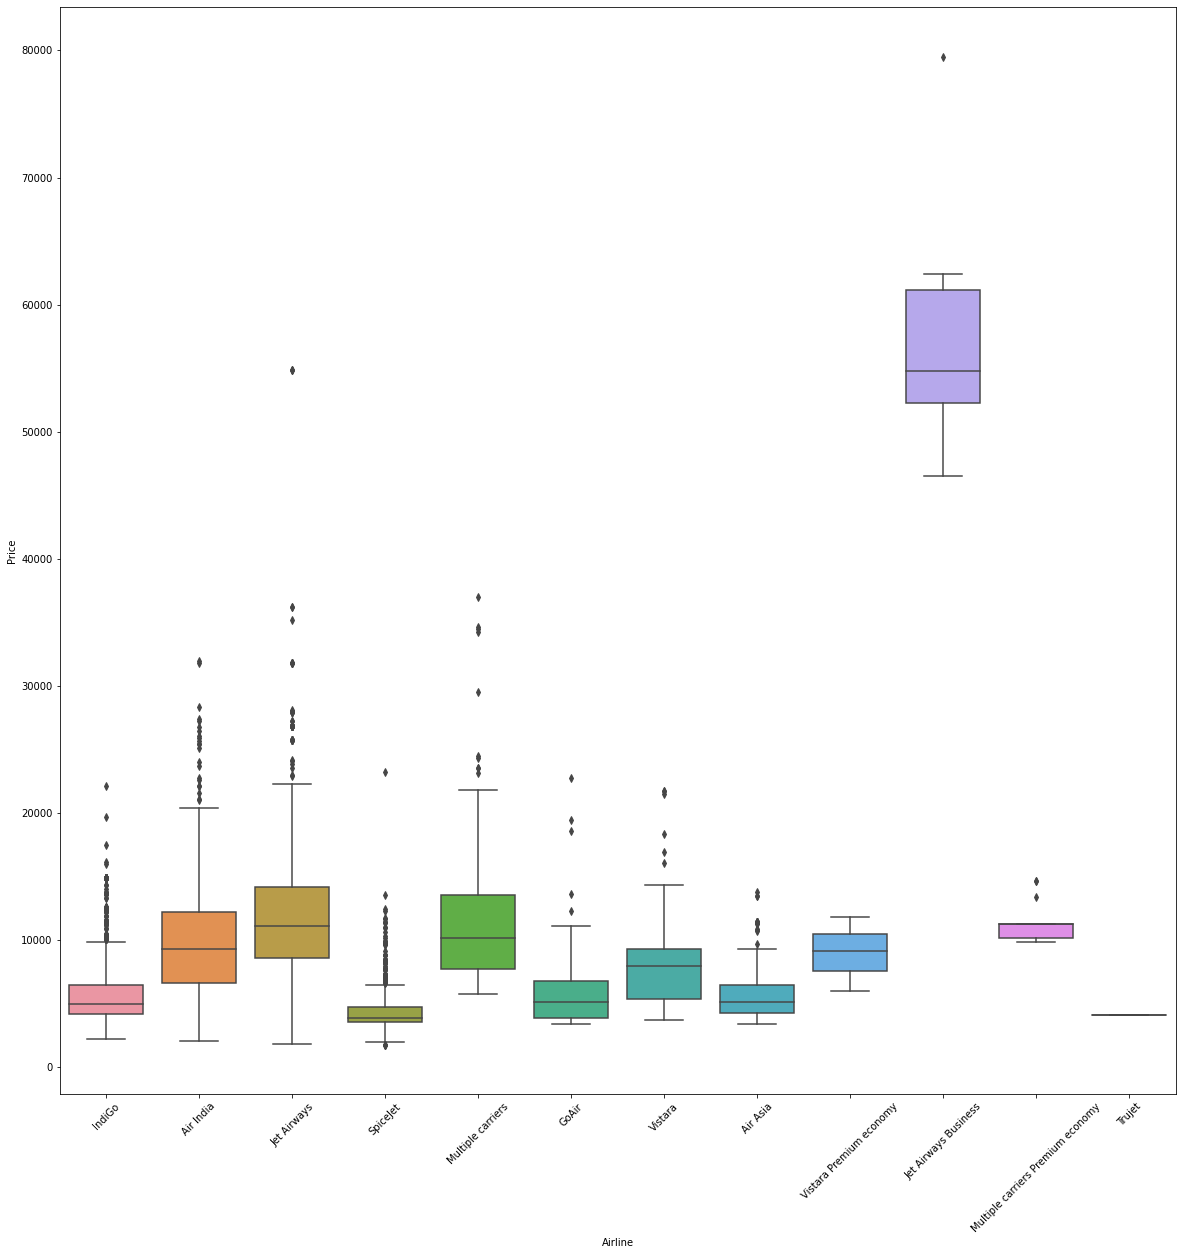

In [28]:
airline_graph = sns.catplot(x = "Airline", y = "Price", data=data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

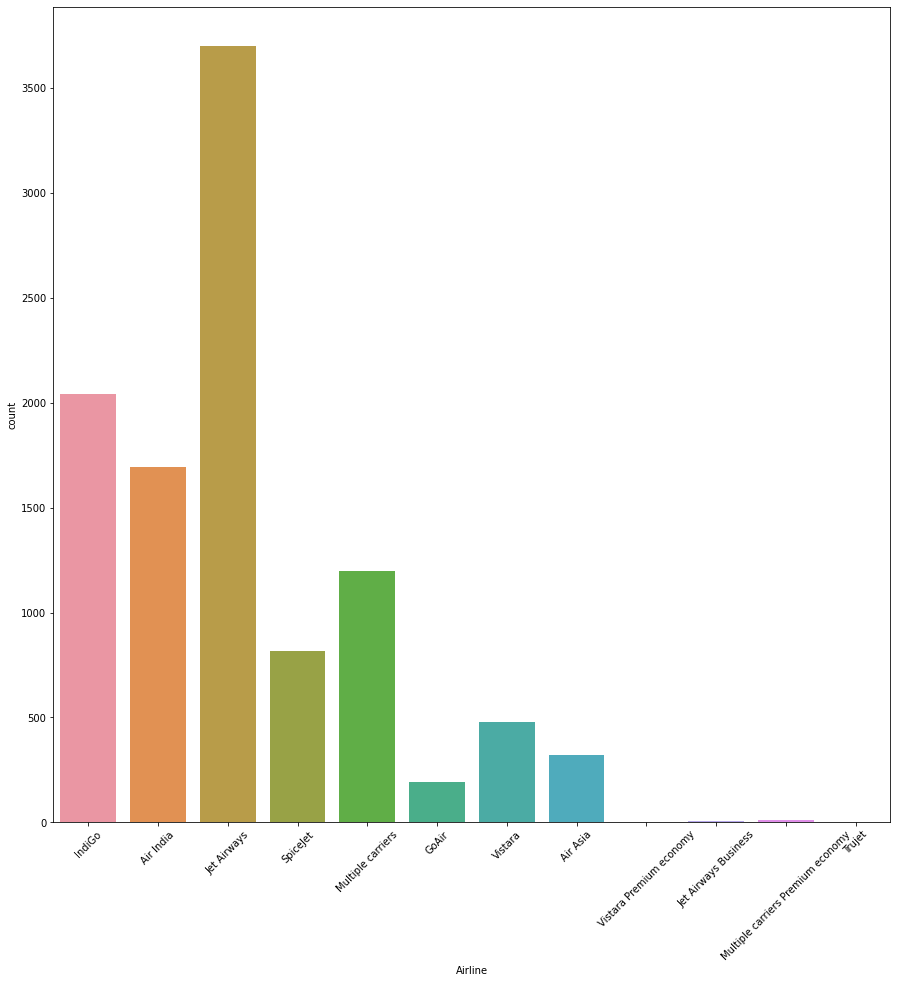

In [29]:
# figure size in inches
rcParams['figure.figsize'] = 15,15
# Price vs Source
airline_graph = sns.countplot(x = "Airline", data=data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

In [119]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

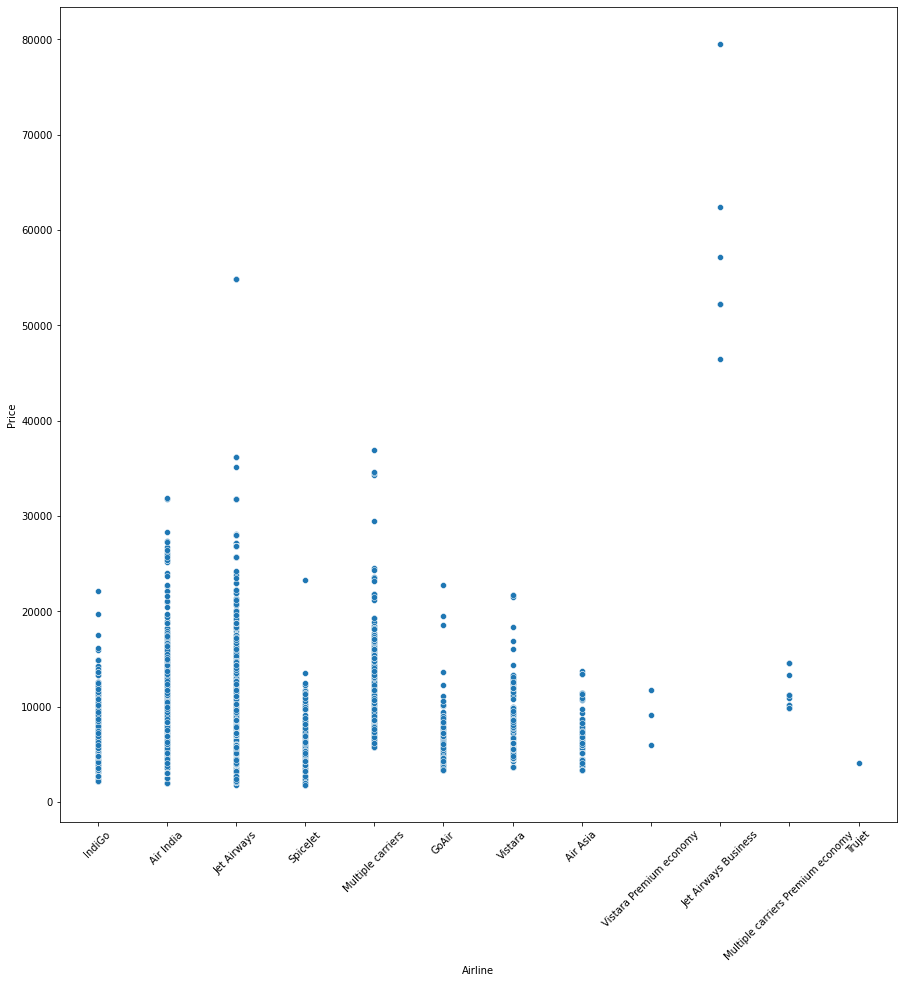

In [30]:
airline_graph = sns.scatterplot(x = "Airline", y = "Price", data = data)
for item in airline_graph.get_xticklabels():
    item.set_rotation(45)

2. Price plots

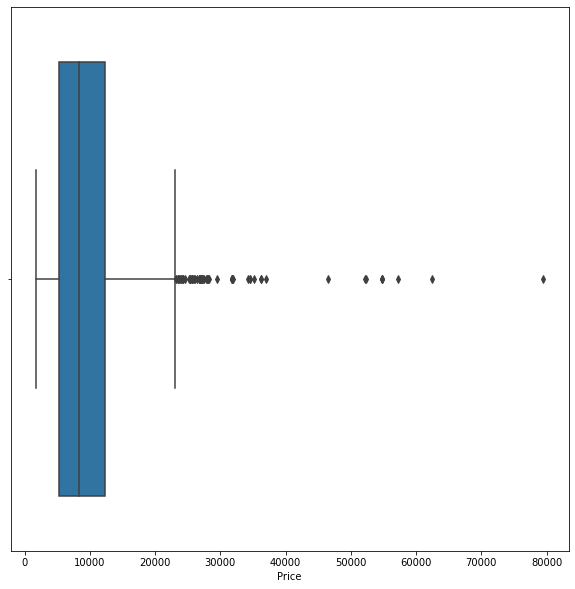

In [31]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.boxplot(x = "Price", data = data)

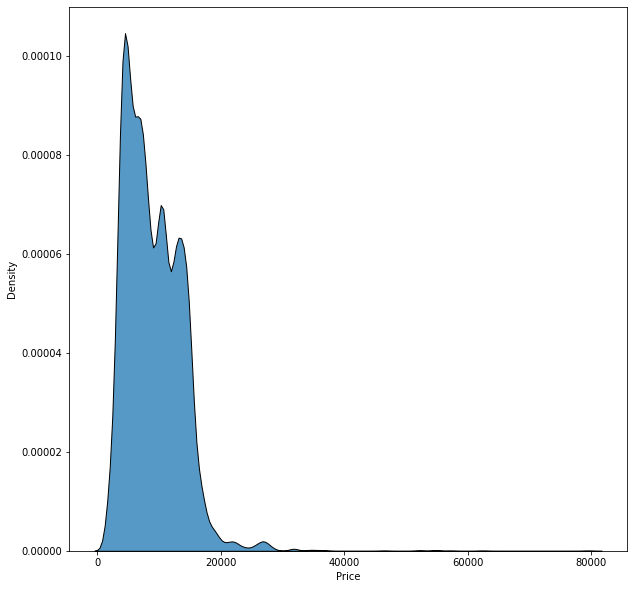

In [32]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.kdeplot(x = "Price", data = data, multiple="stack")

3. Source vs Price

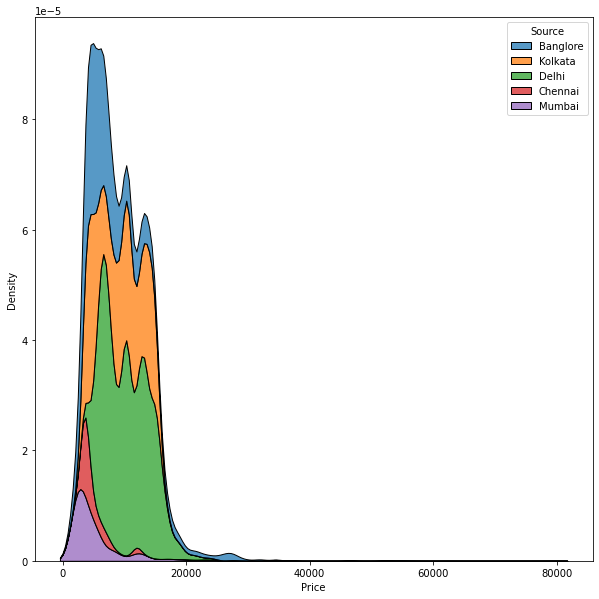

In [33]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
# Price vs Source
sns.kdeplot(x = "Price", data=data, hue = "Source", multiple="stack")

In [125]:
# % Flights from Source
df["Source"].value_counts()/df.shape[0]*100

Delhi       42.469344
Kolkata     26.874473
Banglore    20.565384
Mumbai       6.524385
Chennai      3.566414
Name: Source, dtype: float64

4. Destination vs Price

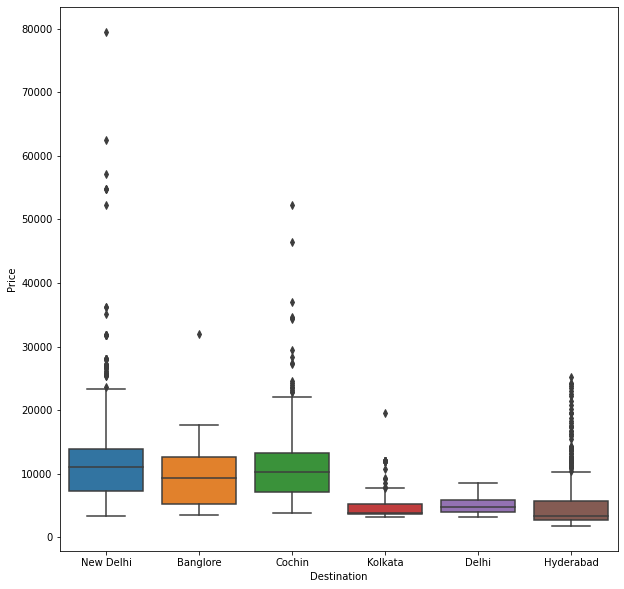

In [34]:
# Price vs Destination
sns.boxplot(x = "Destination", y = "Price", data=data)

In [126]:
# % Flights to Destination
df["Destination"].value_counts()/df.shape[0]*100

Cochin       42.469344
Banglore     26.874473
Delhi        11.841243
New Delhi     8.724141
Hyderabad     6.524385
Kolkata       3.566414
Name: Destination, dtype: float64

5. Total_Stops vs Price

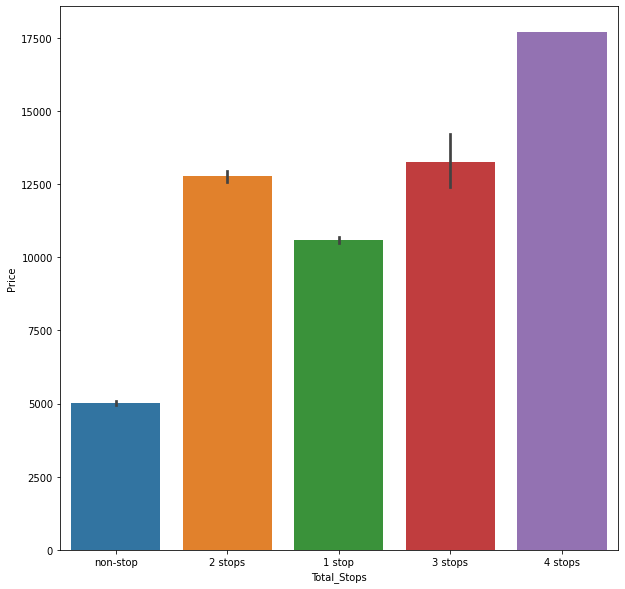

In [35]:
# figure size in inches
rcParams['figure.figsize'] = 10,10
sns.barplot(x = "Total_Stops", y = "Price", data = data)

In [127]:
# % Stops for Flights
df["Total_Stops"].value_counts()/df.shape[0]*100

1 stop      52.653749
non-stop    32.678087
2 stops     14.228213
3 stops      0.421230
4 stops      0.009361
Name: Total_Stops, dtype: float64

Time Features - Feature Splitting

In [36]:
# 1. "Date_of_Journey"

In [37]:
pd.to_datetime(data["Date_of_Journey"]).dt.year.unique()

array([2019])

In [38]:
data["journey_day"] = pd.to_datetime(data["Date_of_Journey"]).dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"]).dt.month

In [39]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)
data.iloc[0]

Airline                IndiGo
Source               Banglore
Destination         New Delhi
Dep_Time                22:20
Arrival_Time     01:10 22 Mar
Duration               2h 50m
Total_Stops          non-stop
Price                    3897
journey_day                24
journey_month               3
Name: 0, dtype: object

In [40]:
time_feat.remove("Date_of_Journey")
time_feat.append("journey_day")
time_feat.append("journey_month")

In [41]:
# 2. "Duration"

In [42]:
data["Duration"] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').\
str.replace('m','*1').apply(eval)

In [43]:
# 3. Dep_Time & Arrival_Time

In [44]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_minute"] = pd.to_datetime(data["Dep_Time"]).dt.minute 

In [45]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [46]:
data.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [47]:
time_feat.remove("Dep_Time")
time_feat.append("Dep_hour")
time_feat.append("Dep_minute")

time_feat.remove("Arrival_Time")
time_feat.append("Arrival_hour")
time_feat.append("Arrival_minute")

In [48]:
time_feat

['Duration',
 'journey_day',
 'journey_month',
 'Dep_hour',
 'Dep_minute',
 'Arrival_hour',
 'Arrival_minute']

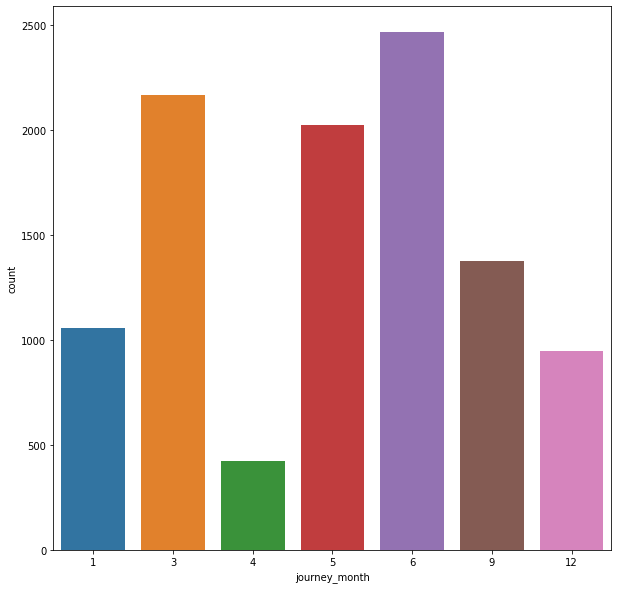

In [49]:
# Duration vs Price 
sns.countplot(x = "journey_month", data = data)

In [50]:
cat_feat

['Airline', 'Source', 'Destination', 'Total_Stops']

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
data_demo = data.copy()

In [53]:
data_demo = pd.get_dummies(data_demo,columns = ['Airline', 'Source', 'Destination'], drop_first = True)

In [54]:
data_demo.shape

(10463, 29)

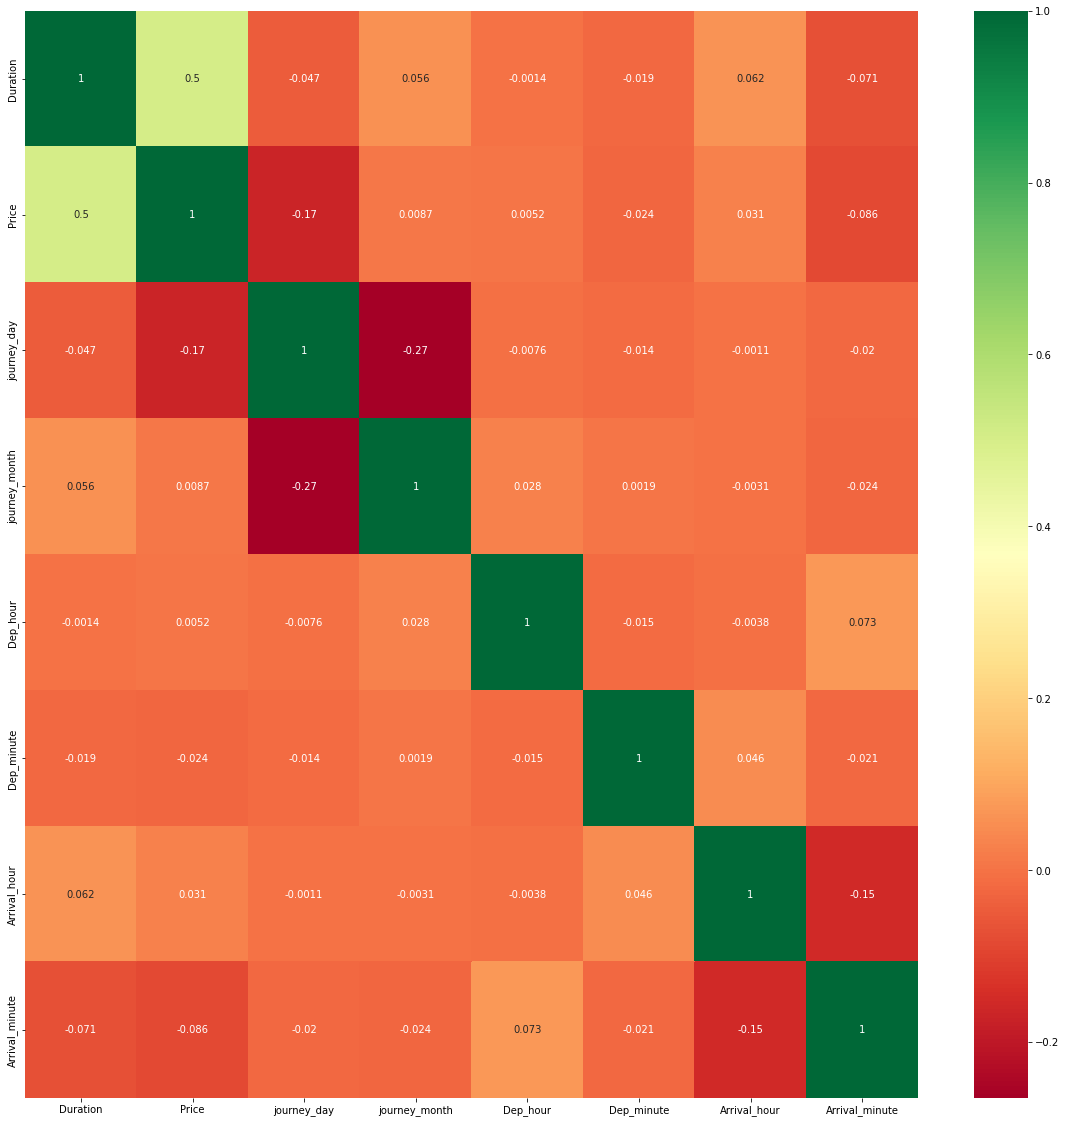

In [55]:
# figure size in inches
rcParams['figure.figsize'] = 20,20
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

In [56]:
data.iloc[0]

Airline              IndiGo
Source             Banglore
Destination       New Delhi
Duration                170
Total_Stops        non-stop
Price                  3897
journey_day              24
journey_month             3
Dep_hour                 22
Dep_minute               20
Arrival_hour              1
Arrival_minute           10
Name: 0, dtype: object

In [57]:
# Imbalance in data
y = data["Price"]
X = data.drop(["Price"],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


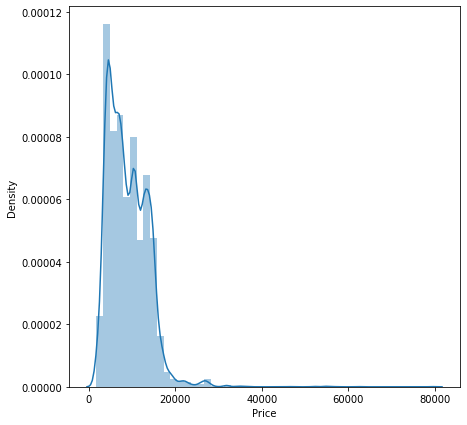

In [58]:
rcParams['figure.figsize'] = 7,7
sns.distplot(y)

2. FEATURE TRANSFORMATION

In [175]:
df_new = df.copy()

Drop rows with categories having 1 count

In [222]:
def drop_exceptions(X : pd.DataFrame, tol = 1, columns = ["Airline","Total_Stops"],)->pd.DataFrame:
  X_new = X.copy()
  for col in columns:
    col_count = X_new[col].value_counts()
    exception_col = col_count[col_count == 1].index.values[0]
    X_new.drop(X_new[X_new[col] == exception_col].index,axis=0,inplace=True,)
    X_new.reset_index(drop=True,inplace=True)
  return X_new

In [223]:
df = drop_exceptions(df,)

In [249]:
from sklearn.model_selection import StratifiedShuffleSplit

In [250]:
df["Price_cat"] = pd.cut(
                df["Price"],
                bins=[0.0,0.5,0.75,1.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5,6,7,8,]
            )
            

In [251]:
strat_train_set = None
strat_test_set = None

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [257]:
strat_df = df[["Price_cat","Source","Destination"]]

In [258]:
for train_index,test_index in split.split(df, strat_df):
    strat_train_set = df.loc[train_index].drop(["Price_cat"],axis=1)
    strat_test_set = df.loc[test_index].drop(["Price_cat"],axis=1 )          

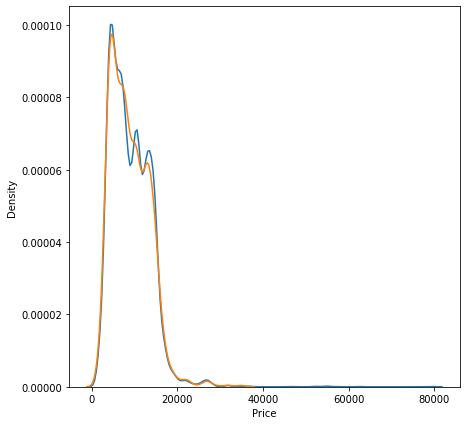

In [259]:
sns.kdeplot(strat_train_set["Price"])
sns.kdeplot(strat_test_set["Price"])

In [260]:
X_train = strat_train_set.drop(["Price"],axis=1)
X_test = strat_test_set.drop(["Price"],axis=1)
y_train = strat_train_set["Price"]
y_test = strat_test_set["Price"]

In [261]:
# Feature Engineering

In [262]:
from sklearn.base import BaseEstimator, TransformerMixin

In [263]:
DAY_KEY = "_day"
MONTH_KEY = "_month"
HOUR_KEY = "_hour"
MINUTE_KEY = "_minute"

In [264]:
class FeatureSplitter(BaseEstimator, TransformerMixin):

  def __init__ (self,date_columns : list =[0], time_columns : list = [2,3],
                 sep = "_"):
    """
    date_columns - 
    Date_of_Journey idx = 0

    time_columns - 
    Dep_Time idx = 2
    Arrival_Time idx = 3

    """
    try:
      self.date_columns : list = date_columns
      self.time_columns : list = time_columns
      self.sep = sep

    except Exception as e:
      print(e)

  def fit (self,X, y=None):
    return self

  def transform(self,X, y=None):
    try:
        # convert any dataframe to numpy array
        X = X.to_numpy()

        # date_columns spliting
        for col in self.date_columns:
          feat_day = pd.to_datetime(X[:,col]).day
          feat_month = pd.to_datetime(X[:,col]).month
          X = np.c_[X,feat_day,feat_month]
        
        # time_columns splitting
        for col in self.time_columns:
          feat_hour = pd.to_datetime(X[:,col]).hour
          feat_mimute = pd.to_datetime(X[:,col]).minute
          X = np.c_[X,feat_hour,feat_mimute]
          
        # delete the redundant columns
        idx_shift = 0
        for col in self.date_columns + self.time_columns:
          X = np.delete(X,col-idx_shift,axis=1)
          idx_shift += 1

        return X
    except Exception as e:
      print(e)


In [265]:
class FeatureCalculator(BaseEstimator, TransformerMixin):

  def __init__ (self,feat_calculate_idx = [2], feat_delete_idx = [0,2]):
    """
    feat_delete_idx - 
    Route idx = 0
    Additional_info idx = 2

    feat_calculate idx - 
    Duration idx = 2
    """
    try:
      self.feat_calculate_idx : list = feat_calculate_idx
      self.feat_delete_idx : list = feat_delete_idx

    except Exception as e:
      print(e)

  def fit (self,X, y=None):
    return self

  def transform(self,X, y=None)-> np.array:
    try:
        # convert any dataframe to numpy array
        if type(X) is not np.ndarray:
          X = X.to_numpy()

        idx_shift = 0
        # delete the req. Features
        for col in self.feat_delete_idx:
          X = np.delete(X,col-idx_shift,axis=1)
          idx_shift += 1
         

        # calculate the feature value
        for col in self.feat_calculate_idx:
          # we are converting duration to
          feat_minutes = pd.Series(X[:,col-idx_shift]).str.replace("h", '*60').\
          str.replace(' ','+').str.replace('m','*1').apply(eval).to_numpy()
          X = np.c_[X,feat_minutes]
          # delete the redundant column
          X = np.delete(X,col-idx_shift,axis=1)
          idx_shift += 1

        return X

    except Exception as e:
      print(e)


In [266]:
num_feat = [feat for feat in data_test if feat not in cat_feat]
num_feat.remove("Price")
print(num_feat)

['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']


In [267]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [268]:
num_pipeline = Pipeline(steps=[
                       ("feature_splitter", FeatureSplitter()),
                       ("feature_calculator", FeatureCalculator()),
                     
])

In [269]:
cat_ohe_pipeline = Pipeline(steps=[
                                   ("One_Hot_Encoder",OneHotEncoder(drop="first",
                                        sparse=False)),
                                   ("simple_imputer", SimpleImputer(
                                       strategy="most_frequent")),
                                   ("scalar", StandardScaler(with_mean=False))
])

In [270]:
cat_ordinal_pipeline = Pipeline(steps=[
                                   ("Ordinal_encoder",OrdinalEncoder()),
                                   ("simple_imputer", SimpleImputer(
                                       strategy="most_frequent")),
                                   ("scalar", StandardScaler(with_mean=False))
])

In [271]:
preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, num_feat),
                ('cat_ohe_pipeline', cat_ohe_pipeline, cat_feat[:-1]),
                ('cat_ordinal_pipeline', cat_ordinal_pipeline, [cat_feat[-1],])
            ],)

In [272]:
X_train_trf = preprocessing.fit_transform(X_train)
X_test_trf = preprocessing.transform(X_test)